In [7]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import os
from urllib import urlretrieve
import sys

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [15]:
url = 'http://ufldl.stanford.edu/housenumbers/'      
train_filename = 'train.tar.gz'
test_filename = 'test.tar.gz'

last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 1% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()

        last_percent_reported = percent

def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    if force or not os.path.exists(filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', filename)
    else:
        raise Exception('Failed to verify ' + filename + '. Can you get to it with a browser?')
    return filename

maybe_download(train_filename, 404141560)
maybe_download(test_filename, 276555967)

Found and verified train.tar.gz
Found and verified test.tar.gz


'test.tar.gz'

In [25]:
import tarfile
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall()
        tar.close()
  
maybe_extract(train_filename)
maybe_extract(test_filename)
print("Done")

train already present - Skipping extraction of train.tar.gz.
test already present - Skipping extraction of test.tar.gz.
Done


In [26]:
# Extract the information from the mat files into json. 
# taken from http://www.a2ialab.com/lib/exe/fetch.php?media=public:scripts:svhn_dataextract_tojson.py.txt

for a in ['test', 'train']:
    cmd = str.format("python svhn_dataextract_tojson.py -f {0}/digitStruct.mat -o {0}/digitStruct", a)
    print(cmd)
    result = os.system(cmd)
    print(result)

python svhn_dataextract_tojson.py -f test/digitStruct.mat -o test/digitStruct
0
python svhn_dataextract_tojson.py -f train/digitStruct.mat -o train/digitStruct
0


In [27]:
# Load the information out of the json files
import json

def load_file_meta(filename):
    results = []
    with open(filename) as data_file:    
        data = json.load(data_file)
    
    for file_info in data:
        pic_info = {}
        pic_info['boxes'] = [{a : item[a] for a in ['top', 'left', 'height', 'width']}
                             for item in file_info['boxes']]
        pic_info['label'] = np.array([int(item['label']) % 10 for item in file_info['boxes']])
        pic_info['filename'] = file_info['filename']
        results.append(pic_info)
    return results
    
train_info = load_file_meta('train/digitStruct.json')
test_info = load_file_meta('test/digitStruct.json')

print("\n".join([str(a) for a in train_info[:5]]))
    
img_width = 160
img_height = 90    

{'boxes': [{'width': 81.0, 'top': 77.0, 'height': 219.0, 'left': 246.0}, {'width': 96.0, 'top': 81.0, 'height': 219.0, 'left': 323.0}], 'filename': u'1.png', 'label': array([1, 9])}
{'boxes': [{'width': 23.0, 'top': 29.0, 'height': 32.0, 'left': 77.0}, {'width': 26.0, 'top': 25.0, 'height': 32.0, 'left': 98.0}], 'filename': u'2.png', 'label': array([2, 3])}
{'boxes': [{'width': 8.0, 'top': 5.0, 'height': 15.0, 'left': 17.0}, {'width': 9.0, 'top': 5.0, 'height': 15.0, 'left': 25.0}], 'filename': u'3.png', 'label': array([2, 5])}
{'boxes': [{'width': 15.0, 'top': 13.0, 'height': 34.0, 'left': 57.0}, {'width': 13.0, 'top': 13.0, 'height': 34.0, 'left': 72.0}], 'filename': u'4.png', 'label': array([9, 3])}
{'boxes': [{'width': 21.0, 'top': 7.0, 'height': 46.0, 'left': 52.0}, {'width': 15.0, 'top': 10.0, 'height': 46.0, 'left': 74.0}], 'filename': u'5.png', 'label': array([3, 1])}


************************************************************
Original (32, 70)


/home/brad/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


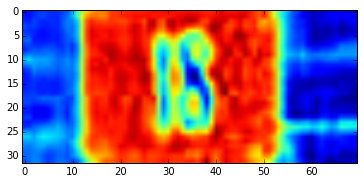

Zoomed (90, 197)


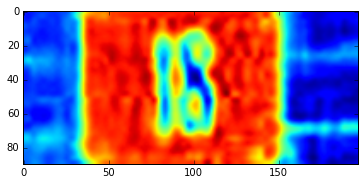

Cropped (90, 160)
Center 91.40625 45.0


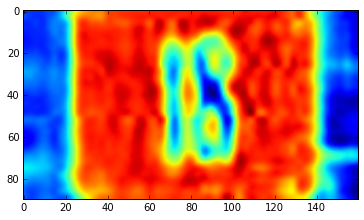

Filename:3618.png
Label:[1 8]
Color range: 0.5 -0.5
************************************************************
Original (49, 141)


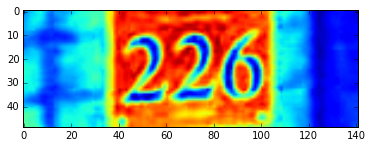

Zoomed (90, 259)


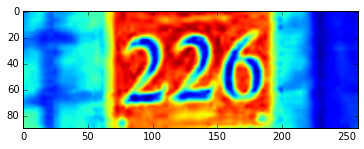

Cropped (90, 160)
Center 127.959183673 42.2448979592


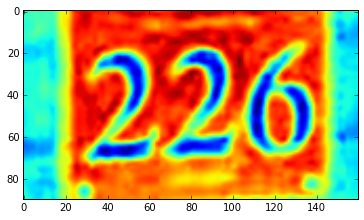

Filename:6643.png
Label:[2 2 6]
Color range: 0.5 -0.5
************************************************************
Original (55, 127)


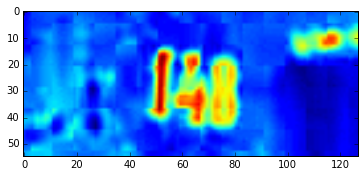

Zoomed (90, 208)


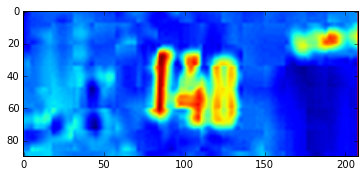

Cropped (90, 160)
Center 108.0 41.4545454545


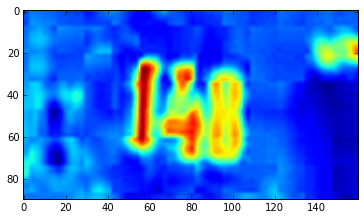

Filename:22862.png
Label:[1 4 8]
Color range: 0.5 -0.5


In [28]:
pixel_depth = 255.0  # Number of levels per pixel.
import os
from scipy import ndimage
import scipy.misc as spm
import scipy.ndimage as spn

screen_ratio = 1080./1920.

def pre_process_file(folder, pic_info, show=False):
    image_file = os.path.join(folder, pic_info['filename'])

    image_data = (ndimage.imread(image_file, flatten=True).astype(float) - 
                pixel_depth / 2) / pixel_depth

    ratio = 1.0 * image_data.shape[0] / image_data.shape[1]

    if ratio < screen_ratio:
        factor = 1.0 * img_height / image_data.shape[0]
    else:
        factor = 1.0 * img_width / image_data.shape[1]

    img = spn.interpolation.zoom(image_data, factor)

    # Center the picture around the bounding boxes as much as possible
    center_x = np.mean([box['left'] + (box['width'] // 2) for box in pic_info['boxes']]) * factor
    center_y = np.mean([box['top'] + (box['height'] // 2) for box in pic_info['boxes']]) * factor

    # The start x pos for copying the image
    s_x = int(center_x) - img_width // 2        
    if s_x < 0:
        s_x = 0
    elif s_x + img_width > img.shape[1]:
        s_x = img.shape[1] - img_width

    s_y = int(center_y) - img_height
    if s_y < 0:
        s_y = 0
    elif s_y + img_height > img.shape[0]:
        s_y = img.shape[0] - img_height

    img_resized = img[s_y:s_y + img_height, s_x:s_x+img_width].astype(np.float32)

    img_colors = img_resized.astype(np.float32) - np.min(img_resized)
    img_colors = img_colors / np.max(img_colors) - 0.5

    if show:
        print('*' * 60)
        print("Original", image_data.shape)
        plt.imshow(image_data)
        plt.show()
        print("Zoomed", img.shape)
        plt.imshow(img)
        plt.show()
        print("Cropped", img_resized.shape)
        print("Center", center_x, center_y)
        plt.imshow(img_resized)
        plt.show()
        print("Filename:%s" % pic_info['filename'])
        print("Label:%s" % pic_info['label'])
        print("Color range:", np.max(img_colors), np.min(img_colors))

    return img_colors, pic_info['label']

np.random.shuffle(train_info)
tmp_img, tmp_label = pre_process_file('train', np.random.choice(train_info, 1)[0], show=True)
tmp_img, tmp_label = pre_process_file('train', np.random.choice(train_info, 1)[0], show=True)
tmp_img, tmp_label = pre_process_file('train', np.random.choice(train_info, 1)[0], show=True)

[6 2]


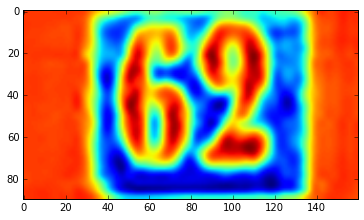

[1 4 9]


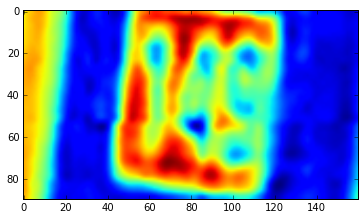

[6 0]


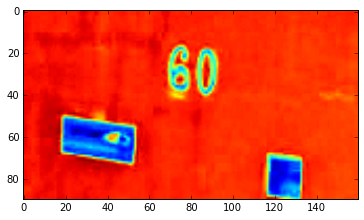

[2 3]


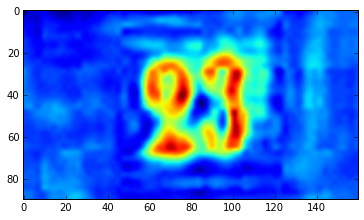

[1 9]


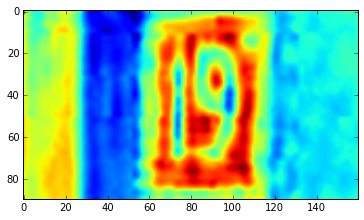

[2 6]


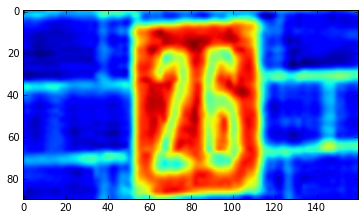

[1 9]


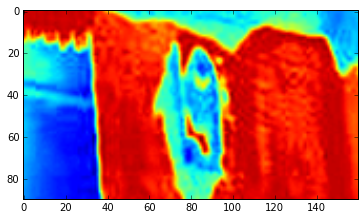

[4]


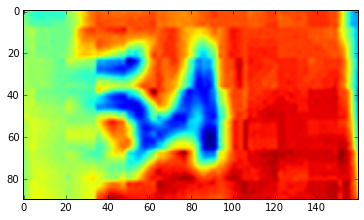

[9]


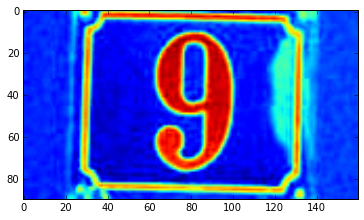

[5 6]


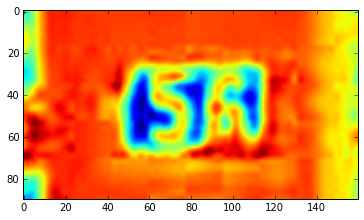

In [29]:
from multiprocessing import Pool
from functools import partial


def pre_process_img_map(args):
    return pre_process_file(**args)


def generate_batch_parallel(folder, pic_info_list, show=False):
    """Load the data for a single letter label."""
    global started
    global finished
    started = 0
    finished = 0
    pool = Pool()    
    results = pool.map(partial(pre_process_file, 'train'), pic_info_list)
    pool.close()
    pool.join()
    
    imgs, labels = zip(*results)
    return np.array(imgs), np.array(labels)
    

np.random.shuffle(train_info)
tmp_pics, tmp_labels = generate_batch_parallel('train', train_info[:10])

for i, tmp_label in enumerate(tmp_labels):
    print(tmp_label)
    plt.imshow(tmp_pics[i])
    plt.show()

In [30]:
%reset_selective -f tmp_.*

In [31]:
no_train_pics = 20000
no_valid_pics = 2000
no_test_pics = 6000

np.random.shuffle(train_info)

start =  0
end = start + no_train_pics
train_dataset, train_labels = generate_batch_parallel('train', train_info[start:end])
print("Done training")
start = end
end = start + no_valid_pics
valid_dataset, valid_labels = generate_batch_parallel('train', train_info[start:end])
print("Done validation")
start = end
end = start + no_test_pics
test_dataset, test_labels = generate_batch_parallel('test', train_info[start:end])
print("Done test")

pickle_file = 'SVHN.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
statinfo = os.stat(pickle_file)
print('Compressed pickle size:%dmb' % (statinfo.st_size // 1024**2))

Done training
Done validation
Done test
Compressed pickle size:1539mb
